In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
train_df = pd.read_csv('./all/train.csv', nrows=1000000)

In [3]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    
    return df

In [4]:
def extract_date_features(df):
    df['dates'] = pd.to_datetime(df['pickup_datetime'])
    
    df['year'] = df['dates'].dt.year
    df['month'] = df['dates'].dt.month
    df['day'] = df['dates'].dt.day
    
    df['hour'] = df['dates'].dt.hour
    df['minute'] = df['dates'].dt.minute
    return df

In [5]:
def date_to_cat(df, features):
    return pd.get_dummies(df, drop_first=True, columns=features)

In [6]:
new_train_df = add_travel_vector_features(train_df)
new_train_df = extract_date_features(new_train_df)
new_train_df = date_to_cat(new_train_df, ['year', 'month', 'day', 'hour', 'minute'])

In [7]:
new_train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 140 columns):
key                   object
fare_amount           float64
pickup_datetime       object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count       int64
abs_diff_longitude    float64
abs_diff_latitude     float64
dates                 datetime64[ns]
year_2010             uint8
year_2011             uint8
year_2012             uint8
year_2013             uint8
year_2014             uint8
year_2015             uint8
month_2               uint8
month_3               uint8
month_4               uint8
month_5               uint8
month_6               uint8
month_7               uint8
month_8               uint8
month_9               uint8
month_10              uint8
month_11              uint8
month_12              uint8
day_2                 uint8
day_3                 uint8
day_4                 

In [8]:
new_train_df.head(n=15)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,...,minute_50,minute_51,minute_52,minute_53,minute_54,minute_55,minute_56,minute_57,minute_58,minute_59
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,...,0,0,1,0,0,0,0,0,0,0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,...,0,0,0,0,0,0,0,0,0,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,...,0,0,0,0,0,0,0,0,0,0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,...,0,1,0,0,0,0,0,0,0,0
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,0.028072,0.026603,...,1,0,0,0,0,0,0,0,0,0
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,0.006200,0.013180,...,0,0,0,0,0,0,0,0,0,0
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,0.038795,0.023090,...,0,0,0,0,0,0,0,0,0,0
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1,0.013384,0.004915,...,0,0,0,0,0,0,0,0,0,0
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2,0.010882,0.024265,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#check for missing values
print(new_train_df.isnull().sum())

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude     10
dropoff_latitude      10
passenger_count        0
abs_diff_longitude    10
abs_diff_latitude     10
dates                  0
year_2010              0
year_2011              0
year_2012              0
year_2013              0
year_2014              0
year_2015              0
month_2                0
month_3                0
month_4                0
month_5                0
month_6                0
month_7                0
month_8                0
month_9                0
month_10               0
month_11               0
month_12               0
day_2                  0
day_3                  0
                      ..
minute_30              0
minute_31              0
minute_32              0
minute_33              0
minute_34              0
minute_35              0
minute_36              0
minute_37              0
minute_38              0


In [10]:
#drop missing values
new_train_df.dropna(how = 'any', axis = 'rows', inplace=True)

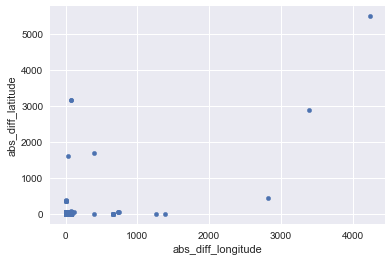

In [11]:
_ = train_df.plot.scatter('abs_diff_longitude', 'abs_diff_latitude')

In [12]:
#drop outliers with a difference of 5 degrees and above
new_train_df = new_train_df[(new_train_df.abs_diff_longitude < 5.0) & (new_train_df.abs_diff_latitude < 5.0)]

In [13]:
new_train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,year_2010,year_2011,...,minute_50,minute_51,minute_52,minute_53,minute_54,minute_55,minute_56,minute_57,minute_58,minute_59
count,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000,...,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000,998025.000000
mean,11.341214,-72.583072,39.959218,-72.582183,39.959556,1.684951,0.022506,0.021085,0.151060,0.158925,...,0.016785,0.016792,0.016659,0.016721,0.016699,0.016874,0.016682,0.016654,0.016485,0.016418
std,9.802452,10.166687,5.984644,10.166570,5.984670,1.323822,0.038233,0.027717,0.358108,0.365606,...,0.128466,0.128492,0.127990,0.128224,0.128141,0.128801,0.128077,0.127971,0.127330,0.127078
min,-44.900000,-121.391210,-74.016587,-121.391248,-74.035197,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992070,40.735032,-73.991393,40.734107,1.000000,0.005792,0.006580,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.500000,-73.981809,40.752727,-73.980158,40.753195,1.000000,0.012420,0.013832,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.500000,-73.967157,40.767174,-73.963734,40.768146,2.000000,0.023602,0.026808,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,500.000000,40.850357,51.084373,40.851027,51.346519,208.000000,4.923874,3.820613,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
wtf = new_train_df[new_train_df.passenger_count > 10]
wtf[['passenger_count']]

,passenger_count
929022,208


In [15]:
#drop any records with more than 3 passengers
new_train_df = new_train_df[new_train_df.passenger_count < 4]

# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [27]:
#features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'abs_diff_longitude', 'abs_diff_latitude', 'year', 'month', 'day', 'hour', 'minute']
X = new_train_df.drop(['key', 'pickup_datetime', 'dates', 'fare_amount'], axis=1)
y = new_train_df['fare_amount']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

In [29]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print('Train score: {}'.format(lr_model.score(X_train, y_train)))
print('Test score: {}'.format(lr_model.score(X_test, y_test)))

Train score: 0.532991210628937
Test score: 0.594043523250338


In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
import math

In [33]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Test RMSE: {}'.format(math.sqrt(mse)))

Test RMSE: 6.188961720883923


# Predict and Submit

In [ ]:
test_df = pd.read_csv('./all/test.csv')

In [ ]:
new_test_df = add_travel_vector_features(test_df)
new_test_df = extract_date_features(new_test_df)
new_test_df = date_to_cat(new_test_df, ['year', 'month', 'day', 'hour', 'minute'])

In [ ]:
y_pred_submission = lr_model.predict(new_test_df.drop(['key', 'pickup_datetime', 'dates'], axis=1))

In [ ]:
submission = new_test_df[['key']]
submission['fare_amount'] = y_pred_submission

In [ ]:
submission.to_csv('./predictions/lr_dates_extracted.csv', index=False)